In [5]:
from data_named import data
import matplotlib.pyplot as plt
import numpy as np

In [62]:
print("GENDER")
n_men = sum(data["gender"] == 1)
n_women = sum(data["gender"] == 2)
print("number of women: " + str(n_women))
print("number of men: " + str(n_men))
print("CONTROL VS VA")
n_control = sum(data["participant_number"]<=70)
n_VA = sum(data["participant_number"]>70)
print("number of control participants: " + str(n_control))
print("number of tested participants: " + str(n_VA))
print("POLITICAL ORIENTATION")
n_left = sum(data["political_orientation"] == 1)
n_center = sum(data["political_orientation"] == 2)
n_right = sum(data["political_orientation"] == 3)
n_other = sum(data["political_orientation"] == 4)
print("number of left-leaning participants: " + str(n_left))
print("number of right-leaning participants: " + str(n_right))
print("number of centrists participants: " + str(n_center))
print("number of participants with no political orientations: " + str(n_other))
print("ETHNICITY")
n_white = sum(data["ethnicity"] == 1)
n_latino = sum(data["ethnicity"] == 2)
n_asian = sum(data["ethnicity"] == 3)
print("number of white participants: " + str(n_white))
print("number of hispanic/latino participants: " + str(n_latino))
print("number of asian participants: " + str(n_asian))
print("EDUCATION")
n_high_school = sum(data["achieved_education"] == 2)
n_bachelor = sum(data["achieved_education"] == 3)
n_master = sum(data["achieved_education"] == 4)
n_other = sum(data["achieved_education"] == 8)
n_high_school = n_high_school + n_other
print("number of participants with a high school diploma: " + str(n_high_school))
print("number of participants with a bachelor diploma: " + str(n_bachelor))
print("number of participants with a master diploma: " + str(n_master))

GENDER
number of women: 10
number of men: 8
CONTROL VS VA
number of control participants: 8
number of tested participants: 10
POLITICAL ORIENTATION
number of left-leaning participants: 7
number of right-leaning participants: 3
number of centrists participants: 6
number of participants with no political orientations: 2
ETHNICITY
number of white participants: 16
number of hispanic/latino participants: 1
number of asian participants: 1
EDUCATION
number of participants with a high school diploma: 4
number of participants with a bachelor diploma: 12
number of participants with a master diploma: 2


In [9]:
data.age.describe()

count    18.000000
mean     23.333333
std       2.376354
min      21.000000
25%      22.000000
50%      23.000000
75%      24.000000
max      31.000000
Name: age, dtype: float64

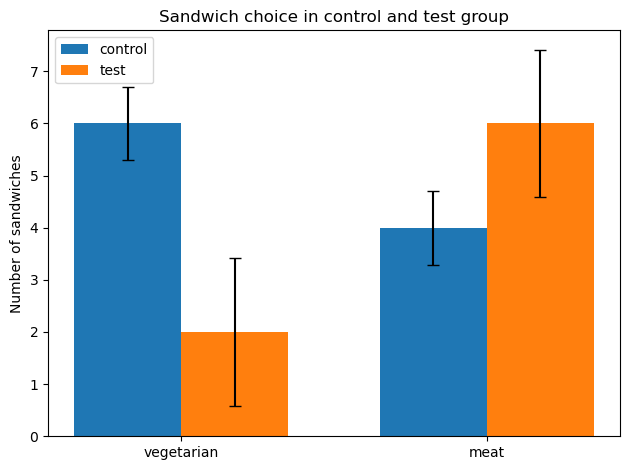

In [20]:
control = data.drop(data.index[data.participant_number <= 70])
test = data.drop(data.index[data.participant_number > 70])
n_veggie_ctrl = sum((control["sandwich"] == 1) | (control["sandwich"] == 2))
n_meat_ctrl = sum((control["sandwich"] == 3) | (control["sandwich"] == 4))
n_veggie_test = sum((test["sandwich"] == 1) | (test["sandwich"] == 2))
n_meat_test = sum((test["sandwich"] == 3) | (test["sandwich"] == 4))

fig, ax = plt.subplots()
labels = ['vegetarian', 'meat']
ctrl_sandwiches = [n_veggie_ctrl, n_meat_ctrl]
test_sandwiches = [n_veggie_test, n_meat_test]

std_error_ctrl = np.std(ctrl_sandwiches) / np.sqrt(len(ctrl_sandwiches))
std_error_test = np.std(test_sandwiches) / np.sqrt(len(test_sandwiches))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, ctrl_sandwiches, width, label='control', yerr=std_error_ctrl, capsize=4)
rects2 = ax.bar(x + width/2, test_sandwiches, width, label='test', yerr=std_error_test, capsize=4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of sandwiches')
ax.set_title('Sandwich choice in control and test group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.savefig("sandwich_average.png")
plt.show()